## Contexte

Présentation des données qui serviront à créer un model IA capable de détecter les email SPAM.  
Nous allons voir plus tard qu'il est possible de faire aussi un modèle en Machine Learning plutôt efficace. 

## Information du dataset

<ul>
<li>Category : Specifies whether mail is spam or not.  

1 --> Spam  
0 --> Not spam</li>  
<li>Message : Raw text messages  
Combinations of Plain messages with headers and also few with HTML tags.</li>  
<li>File_Name: Unique message indicators</li>  
</ul> 

## Import library

In [17]:
#basic
import pandas as pd
import numpy as np
import string

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#nltk
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import warnings
warnings.filterwarnings(action="ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Simplon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Import dataset

In [18]:
data = pd.read_csv('data/Spam Email raw text for NLP.csv')
data

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0


In [37]:
#shape of dataset
print(data.shape)
print('----------------------')
#checking for null values
print(data.isna().sum())
print('----------------------')
#info of data
print(data.info())
print('----------------------')
print(df.CATEGORY.unique())
print('----------------------')
print(df["CATEGORY"].value_counts())

(5796, 2)
----------------------
CATEGORY    0
MESSAGE     0
dtype: int64
----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CATEGORY  5796 non-null   int64 
 1   MESSAGE   5796 non-null   object
dtypes: int64(1), object(1)
memory usage: 90.7+ KB
None
----------------------
[1 0]
----------------------
0    3900
1    1896
Name: CATEGORY, dtype: int64


Nous avons **3 colonnes pour 5796 lignes avec 0 valeurs nulls.**  
En nous intéressant à la colonne **CATEGORY**, notre target, nous constatons un déséquilibre de la target, avec davantage de 0 (non-spam) que de 1 (spam).  
Nous pouvons mieux nous en rendre compte avec quelque plot en guise de visuel.  

In [20]:
# Avant de passer aux visuels, nous supprimons FILE_NAME qui ne servira pas pour notre modèle
data = data.drop('FILE_NAME', axis=1)

In [21]:
data.head()

,CATEGORY,MESSAGE
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...
2,1,This is a multi-part message in MIME format.\n...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,1,This is the bottom line. If you can GIVE AWAY...


In [22]:
### just once ###
# data.to_csv('spam.csv', index=False)

## Import new clean dataset

In [23]:
df = pd.read_csv('data/spam.csv')
df

,CATEGORY,MESSAGE
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ..."
1,1,ATTENTION: This is a MUST for ALL Computer Use...
2,1,This is a multi-part message in MIME format.\n...
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...
4,1,This is the bottom line. If you can GIVE AWAY...
...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver..."
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\..."
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w..."


## EDA

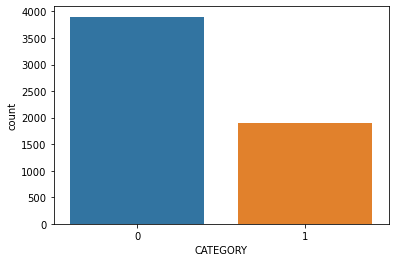

In [25]:
#valuecount in CATEGORY (target)
sns.countplot(df["CATEGORY"])
plt.show()

In [26]:
# Nous créons une colonne pour voir le nombre de caractères dans une phrase

#nomber of characters
df['num_characters'] = df['MESSAGE'].apply(len)

In [27]:
df.head()

,CATEGORY,MESSAGE,num_characters
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",612
1,1,ATTENTION: This is a MUST for ALL Computer Use...,1298
2,1,This is a multi-part message in MIME format.\n...,6691
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,1141
4,1,This is the bottom line. If you can GIVE AWAY...,1795


In [28]:
# Ici nous créons une nouvelle colonne pour voir le nombre de mots dans une phrase

# num of words
df['num_words'] = df['MESSAGE'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,CATEGORY,MESSAGE,num_characters,num_words
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",612,102
1,1,ATTENTION: This is a MUST for ALL Computer Use...,1298,201
2,1,This is a multi-part message in MIME format.\n...,6691,1460
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,1141,180
4,1,This is the bottom line. If you can GIVE AWAY...,1795,394


In [30]:
# Création du nombre de sentences par ligne du dataset que l'on fait grâce au tokenizer de nltk

#creat the sentences
df['num_sentences'] = df['MESSAGE'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,CATEGORY,MESSAGE,num_characters,num_words,num_sentences
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",612,102,7
1,1,ATTENTION: This is a MUST for ALL Computer Use...,1298,201,13
2,1,This is a multi-part message in MIME format.\n...,6691,1460,15
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,1141,180,9
4,1,This is the bottom line. If you can GIVE AWAY...,1795,394,13


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5796.000000,5796.000000,5796.000000
mean,2780.795204,527.000518,13.306763
std,6940.076914,1044.704106,28.210874
min,36.000000,2.000000,1.000000
25%,664.750000,118.000000,4.000000
50%,1211.000000,230.000000,8.000000
75%,2505.250000,501.000000,13.000000
max,234358.000000,18447.000000,809.000000


In [33]:
# look describe for "no_spam"
df[df['CATEGORY'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3900.000000,3900.000000,3900.000000
mean,1615.114359,305.343846,11.952308
std,3890.481160,692.825810,26.459583
min,54.000000,3.000000,1.000000
25%,545.750000,99.000000,5.000000
50%,987.000000,189.000000,8.000000
75%,1640.000000,320.000000,13.000000
max,110372.000000,17319.000000,809.000000


In [34]:
# look describe for "spam"
df[df['CATEGORY'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1896.000000,1896.000000,1896.000000
mean,5178.556435,982.939873,16.092827
std,10372.981780,1428.580611,31.332515
min,36.000000,2.000000,1.000000
25%,1113.750000,189.000000,4.000000
50%,2543.500000,520.500000,8.000000
75%,5730.250000,1236.250000,16.000000
max,234358.000000,18447.000000,406.000000


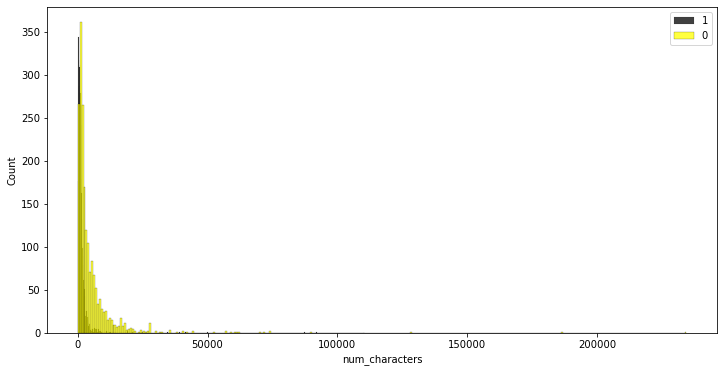

---------------------------------------------------------------


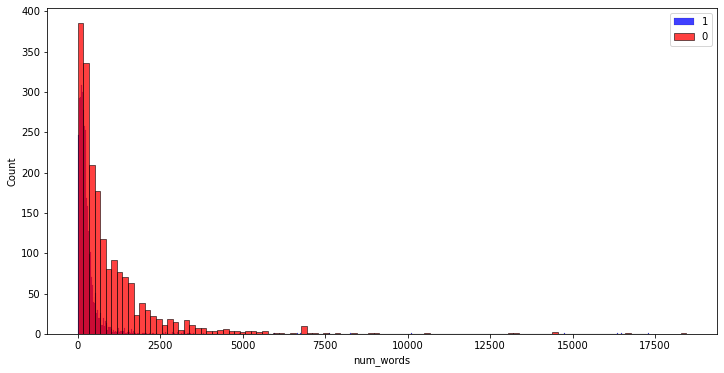

In [35]:
#plot for look the difference
plt.figure(figsize=(12,6))
sns.histplot(df[df['CATEGORY'] == 0]['num_characters'], color= 'black')
sns.histplot(df[df['CATEGORY'] == 1]['num_characters'],color='yellow')
plt.legend(df['CATEGORY'].unique())
plt.show()

print('---------------------------------------------------------------')

plt.figure(figsize=(12,6))
sns.histplot(df[df['CATEGORY'] == 0]['num_words'], color= 'blue')
sns.histplot(df[df['CATEGORY'] == 1]['num_words'],color='red')
plt.legend(df['CATEGORY'].unique())
plt.show()

Nous pouvons constater que la plupart des caratères et des mots ne sont pas considérés comme du "spam".  
La taille du mail et des phrases semblent importantes pour définir qu'un caractère et/ou un mot soit perçu comme une potentielle source de "SPAM".  
Plus la phrase est courte, plus le mail a de forte chance d'être un SPAM, a contrario s'il est plus long il est possible qu'il diffuse un message qui ne vient pas d'un expéditeur indésirable.  

## Save final dataset for model

In [36]:
### just once ###
# df.to_csv('spam_newcol.csv', index=False)